In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pharmacy_new.csv")

In [4]:
df[['group','pcn']].isnull().sum()

group    3909025
pcn      3626961
dtype: int64

In [5]:
df['patient_pay'].describe()

count    1.391024e+07
mean     2.406044e+01
std      3.952487e+01
min      0.000000e+00
25%      8.850000e+00
50%      1.326000e+01
75%      1.889000e+01
max      5.579300e+02
Name: patient_pay, dtype: float64

In [6]:
df.isna().sum()

Unnamed: 0                0
tx_date                   0
pharmacy                  0
diagnosis                 0
drug                      0
bin                       0
pcn                 3626961
group               3909025
rejected                  0
patient_pay               0
brand                     0
drug_name                 0
month                     0
diagnosis_letter          0
diagnosis_number          0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,brand,drug_name,month,diagnosis_letter,diagnosis_number
0,0,2022-01-02,6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol,1,G,99.93
1,1,2022-01-02,42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted,1,U,60.52
2,2,2022-01-02,37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol,1,Q,85.91
3,3,2022-01-02,30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted,1,U,60.52
4,4,2022-01-02,18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate,1,N,55.01


In [4]:
drug = df['drug_name'].unique()

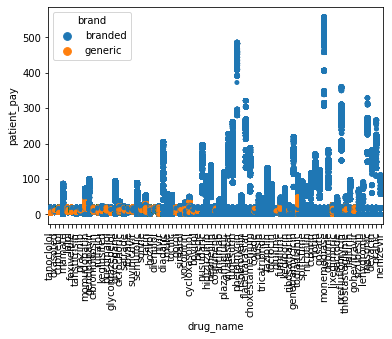

In [5]:
drugplot = sns.stripplot(data=df,
                x="drug_name",
                y="patient_pay",
                hue="brand")

drugplot.set_xticklabels(labels=drug, rotation=90) 
plt.show()

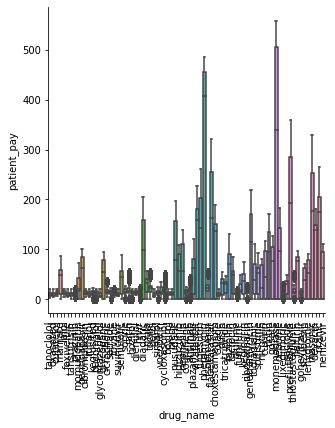

In [13]:
drugplot = sns.catplot(x="drug_name",
                y="patient_pay",
                data=df,
                kind="box")
plt.xticks(rotation=90)
plt.show()

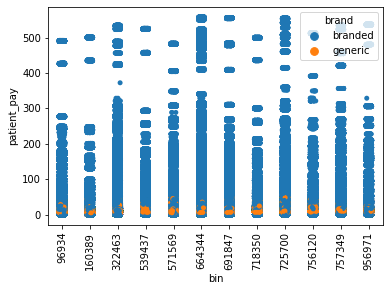

In [14]:
binplot = sns.stripplot(data=df,
                x="bin",
                y="patient_pay",
                hue="brand")

plt.xticks(rotation=90)
plt.show()

In [15]:
df['brand'].value_counts(normalize=True)

branded    0.628222
generic    0.371778
Name: brand, dtype: float64

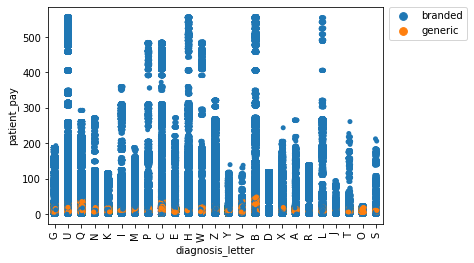

In [7]:
diagnosisplot = sns.stripplot(data=df,
                x="diagnosis_letter",
                y="patient_pay",
                hue="brand")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=90)
plt.show()

In [17]:
df['rejected'].value_counts(normalize=True)

False    0.921866
True     0.078134
Name: rejected, dtype: float64

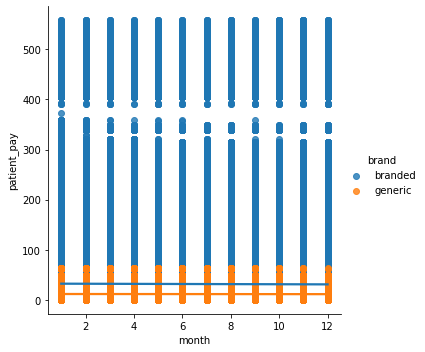

In [6]:
sns.lmplot(data=df,
x="month",
y="patient_pay",
hue="brand")

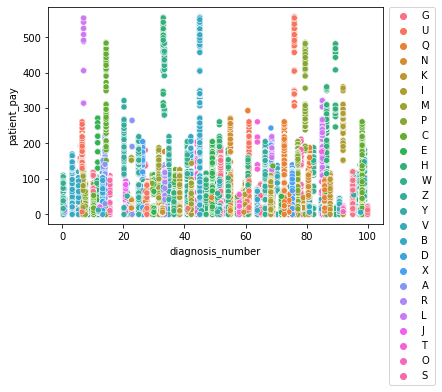

In [8]:
sns.scatterplot(x="diagnosis_number" , y="patient_pay" , data=df, hue="diagnosis_letter")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

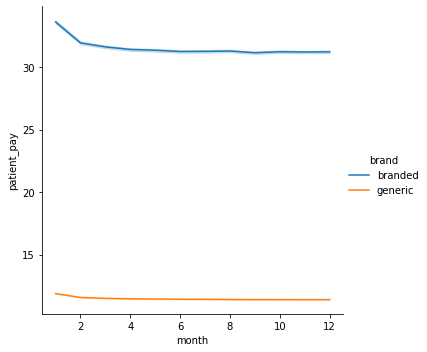

In [11]:
sns.relplot(x="month", y="patient_pay", data=df, kind="line", hue='brand')
plt.show()

In [12]:
df['pharmacy'].value_counts()

24    262313
52    259550
39    254043
10    252460
5     251093
6     251042
17    250900
28    249804
11    248813
12    248518
9     248059
4     247913
44    247527
33    247221
16    246120
29    245834
1     244117
15    243701
36    243697
31    243151
19    242660
48    242546
53    241535
2     241216
30    240568
54    240496
51    240350
0     240170
46    239342
27    239247
43    238486
40    238107
37    238101
45    238064
8     238041
42    237683
35    237531
3     237205
55    237135
49    236160
57    235979
23    234519
26    233953
41    233673
50    233632
20    232836
32    232801
18    232406
25    232072
14    229749
47    229628
34    229180
22    227653
56    227430
38    225956
7     224938
21    223477
13    219843
Name: pharmacy, dtype: int64

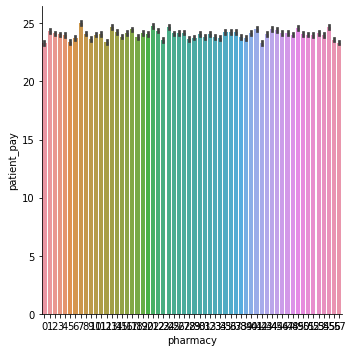

In [13]:
sns.catplot(x="pharmacy",
y="patient_pay",
data=df,
kind="bar")
plt.show()

In [5]:
df[df['rejected']==True]['patient_pay'].mean()

0.0

In [ ]:
sns.swarmplot(data=df, x="drug_name", y="patient_pay", hue="diagnosis_letter")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [7]:
drug_rejected = df.groupby('rejected')['drug_name'].value_counts()

In [11]:
drug_rejected[True] 

drug_name
hidizuzunib        151370
mule               131009
diadaric            59116
nusudaric           55274
plazamiglutic       53913
                    ...  
nenizevir             351
thiostasteglume       351
colade                110
gohevitravir           94
lixegimoric            19
Name: drug_name, Length: 62, dtype: int64

In [12]:
drug_rejected[False] 

drug_name
prazinib        1711757
rulfalol         718503
pucomalol        542838
tanoclolol       513317
foxivelule       484137
                 ...   
dusin              7431
sizubesin          5813
gohevitravir       4020
lehydrome          1784
nenizevir           761
Name: drug_name, Length: 77, dtype: int64

In [13]:
diagnosis = df.groupby('diagnosis_letter')['diagnosis_number'].value_counts()

In [16]:
diagnosis['U']

diagnosis_number
60.52    530884
27.71    426311
61.13    211261
41.19    104217
6.52      63095
75.95     24093
97.42        40
7.99         32
Name: diagnosis_number, dtype: int64

In [17]:
df[df['diagnosis_letter'] =='U'].groupby('diagnosis_number')['drug_name'].value_counts()

diagnosis_number  drug_name  
6.52              ratin           37441
                  notin           13415
                  tugesutin       12239
7.99              keglusited         20
                  oxasoted           12
27.71             foxivelule      91149
                  tovane          81326
                  colifunene      78241
                  glulune         77662
                  sorine          73955
                  glycogane       23978
41.19             foxivelule     104217
60.52             oxasoted       168706
                  foxivelule     166454
                  keglusited     145419
                  mule            50305
61.13             prazinib        66271
                  ratin           48577
                  momudobatin     45653
                  hidizuzunib     18818
                  notin           16986
                  tugesutin       14956
75.95             monemodiase     24093
97.42             nicotilin          28
          

In [18]:
df[df['diagnosis_letter'] =='U'].groupby(['diagnosis_number','drug_name'])['patient_pay'].mean()

diagnosis_number  drug_name  
6.52              notin           74.975814
                  ratin           19.217275
                  tugesutin      107.891696
7.99              keglusited      16.342000
                  oxasoted         6.170000
27.71             colifunene      14.561530
                  foxivelule      10.114014
                  glulune         11.590467
                  glycogane       45.039681
                  sorine          15.080272
                  tovane          11.168428
41.19             foxivelule      10.163504
60.52             foxivelule      10.069997
                  keglusited      14.364255
                  mule            27.488299
                  oxasoted         9.947131
61.13             hidizuzunib     48.439772
                  momudobatin     28.265322
                  notin           73.579357
                  prazinib        11.720518
                  ratin           18.822272
                  tugesutin      109.090556
75